# The Perceptron

Based on a simple (the simplest) nerual net.

![http://i.stack.imgur.com/KUvpQ.png](http://i.stack.imgur.com/KUvpQ.png)


$h(x) = sign((\sum{w_ix_i}) - threshold)$

Can simplify by adding an artificial coordinate $x_0$ and $w_0$  where $x_0 = 1$ 

This makes it easy

$h(x) = sign(\sum{w_ix_i})$

or in vector notation

$h(x) = sign(w \cdot x)$



## So, how is this a learning system?

We need a learning algorithm

Supervised Learning requires a training set where we have some data and we know the answer.

1. Given a training set of $\vec x,\vec y$
2. Classify all of the points in $\vec x$
3. Pick a point $n$ from $\vec x$ that was misclassified
4. update the weight vector $\vec w$ using: $\vec w = \vec w + y_n \vec w_n$

Repeat 2 -- 4 until all points are classified correctly.  OR at some upper limit of iteration.


See https://datasciencelab.wordpress.com/2014/01/10/machine-learning-classics-the-perceptron/ for a nice writeup.

In [4]:
%matplotlib inline
import numpy as np
import random
import pandas as pd
import seaborn as sbn
sbn.set()
import matplotlib.pyplot as plt

#ts = [np.array([1,5,10]), np.array([1,3,11]), np.array([1,7,10]), np.array([1,2,3]), np.array([1,6,2]),np.array([1,1,1])]
#cls = [1,1,1,-1,-1,-1]
ts = [np.array([1,.2,.1]),np.array([1,.4,.6]),np.array([1,.5,.2]),np.array([1,.7,.9])]
cls = [1,1,1,-1]
w = np.array([1,1,1])


In [67]:
#Some sample data
pts = [(1, 4, 1),
 (1, 4, 10),
 (1, 3, 5),
 (1, 4, 4),
 (1, 8, 10),
 (1, 6, 9),
 (1, 7, 11),
 (1, 5, 7),
 (1, 4, 2),
 (1, 2, 3),
 (1, 7, 6)
      ]


y = [-1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1]

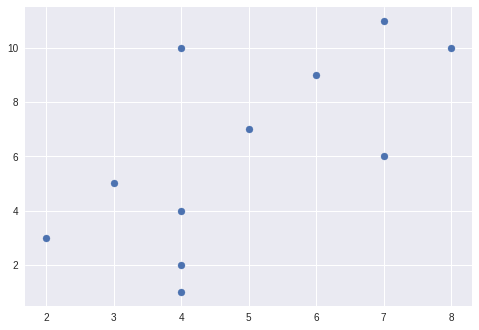

In [68]:
plt.scatter([x[1] for x in pts], [x[2] for x in pts])

In [81]:
train = [np.array(x) for x in pts]
train


[array([1, 4, 1]),
 array([ 1,  4, 10]),
 array([1, 3, 5]),
 array([1, 4, 4]),
 array([ 1,  8, 10]),
 array([1, 6, 9]),
 array([ 1,  7, 11]),
 array([1, 5, 7]),
 array([1, 4, 2]),
 array([1, 2, 3]),
 array([1, 7, 6])]

In [70]:
from sklearn.base import BaseEstimator, TransformerMixin

class Perceptron(BaseEstimator, TransformerMixin):

    def __init__(self):
        super().__init__()
        self.w = []

    def fit(self, ts, cls):
        self.w = np.array([random.random() for x in range(len(ts[0]))])
        done = False
        count = 0

        while not done and count < 1000000:
            count += 1
            correct = []
            incorrect = []
            # first classify all points

            for ix,i in enumerate(ts):
                if np.sign(np.dot(i,self.w)) == cls[ix]:
                    correct.append(ix)
                else:
                    incorrect.append(ix)

            if len(incorrect) == 0:
                print("Done!",self.w)
                done = True
            else:
                p = random.randrange(len(incorrect))
                x = ts[incorrect[p]]
                self.w = self.w + x*cls[incorrect[p]]
                print(len(incorrect), self.w)


    def transform(self, data):
        return data

    def predict(self, tset):
        predictions = []
        for s in tset:
            predictions.append(np.sign(np.dot(s, self.w)))

        return predictions

        




In [76]:
ptron = Perceptron()
ptron.fit(train,y)
ptron.predict([np.array([1,1,1]), np.array([1,8,8])])

5 [-0.42370496 -1.78002952 -2.57490175]
6 [ 0.57629504  2.21997048  7.42509825]
5 [-0.42370496 -1.78002952  6.42509825]
4 [-1.42370496 -3.78002952  3.42509825]
3 [-0.42370496  3.21997048  9.42509825]
5 [-1.42370496  0.21997048  4.42509825]
5 [-2.42370496 -3.78002952  2.42509825]
5 [-1.42370496  1.21997048  9.42509825]
5 [-2.42370496 -0.78002952  6.42509825]
5 [-3.42370496 -2.78002952  3.42509825]
3 [-4.42370496 -5.78002952 -1.57490175]
6 [-3.42370496  1.21997048  4.42509825]
5 [-4.42370496 -2.78002952  2.42509825]
3 [-3.42370496  2.21997048  9.42509825]
5 [-4.42370496 -1.78002952  8.42509825]
4 [-5.42370496 -5.78002952  6.42509825]
3 [-6.42370496 -7.78002952  3.42509825]
6 [ -5.42370496  -2.78002952  10.42509825]
4 [-6.42370496 -5.78002952  5.42509825]
2 [ -5.42370496   1.21997048  11.42509825]
5 [ -6.42370496  -2.78002952  10.42509825]
4 [-7.42370496 -6.78002952  6.42509825]
2 [-8.42370496 -9.78002952  1.42509825]
6 [-7.42370496 -2.78002952  7.42509825]
3 [-8.42370496 -6.78002952  3.4

[-1.0, 1.0]

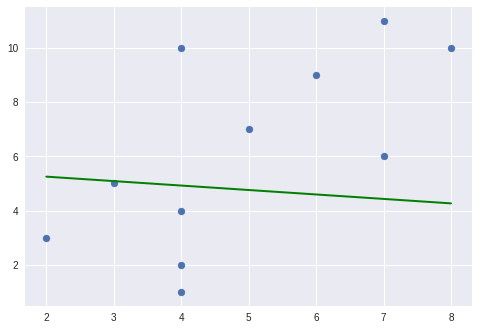

In [77]:
plt.scatter([x[1] for x in pts], [x[2] for x in pts])
vec = ptron.w
l = np.linspace(2,8)
aa, bb = -vec[1]/vec[2], -vec[0]/vec[2]
plt.plot(l, aa*l+bb, 'g-', lw=2)
plt.show()

### Lets look at a classic dataset in machine learning.  The iris dataset

Attribute Information:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: 
  - Iris Setosa
  - Iris Versicolour
  - Iris Virginica

Since we only can do a binary classification right now, lets look at setosa versus virginica


In [64]:
iris = pd.read_csv('/home/faculty/millbr02/pub/iris.csv',header=None)
iris.columns = ['sepallen','sepalwidth','petallen','petalwidth','kind']
iris.head()

,sepallen,sepalwidth,petallen,petalwidth,kind
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


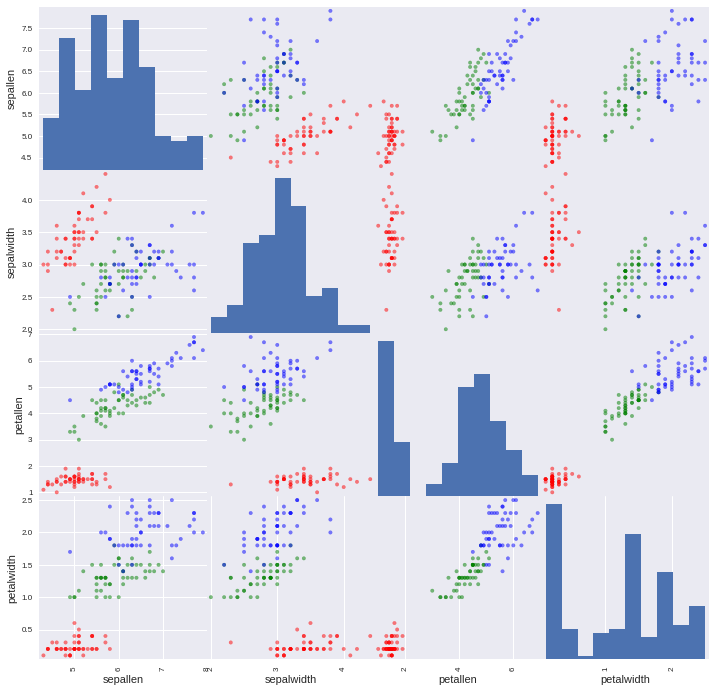

In [63]:
#c = df[(df.kind == 'Iris-setosa') | (df.kind == 'Iris-virginica')]
#sbn.pairplot(c[['sepallen','sepalwidth','petallen','petalwidth']])
from pandas.tools.plotting import scatter_matrix
colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
scatter_matrix(iris, figsize=(12,12),c=iris.kind.map(lambda x: colors[x]))
plt.show()

### Modify the dataset into a test set and training set then train your perceptron on the Setosa - Verginica split

In [79]:
d = {'Iris-setosa': 1, 'Iris-versicolor': -1, 'Iris-virginica': -1}
iris['label'] = iris.kind.map(lambda x : d[x])
iris.head()

,sepallen,sepalwidth,petallen,petalwidth,kind,label
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


### When making predictions with the test set, what percentage do you predict correctly?

### Does your class work with the cross_validation function?

### Make a confusion matrix.

### compute the precision and recall values

### Plot an ROC curve

### Create a new class that allows you to fit the data to three classes -- You will need more than one perceptron...